# Experiment 2 - Raw Behavioral

This notebook analyzes the raw behavioral data from Experiment 2, without incorporating gaze data.

In [64]:
import pandas as pd; import os; import numpy as np; import seaborn as sb; import scipy; import warnings; import scipy
import statsmodels; import statsmodels.api as sm; from itertools import combinations; import pingouin 
from analysis_helpers import *

%matplotlib inline
warnings.filterwarnings('ignore')

# Data

### Compile Data from All Subs

In [65]:
# directory = '/Users/kirstenziman/Desktop/attention-memory-task/data/'
# dfs = []
# for idx,sub in enumerate(os.listdir(directory)):
#     print(idx)
#     subdir = directory+sub+'/'
#     dfs.append(add_level(sum_pd(subdir), trials='unique'))
#     #dfs = [add_level(x, trials='unique') for x in dfs]
# pickle.dump(dfs, open("/Users/kirstenziman/Desktop/attention-memory-task/behavioral.pkl", "wb" ))    

In [66]:
eye_data
eye_data = eye_read('/Users/kirstenziman/Documents/attention-memory-task/data/','eye_data_exp1.pkl')

NameError: name 'eye_data' is not defined

### Load Pre-compiled Data

In [67]:
df = pd.DataFrame.from_csv('/Users/kirstenziman/Documents/attention-memory-task/behavioral.csv')

In [68]:
df.ix[df['Memory Image'].str.contains("sun", na=False),'Category']='Place'
df.ix[~df['Memory Image'].str.contains("sun", na=False),'Category']='Face'

In [69]:
df.loc[df['Attention Level']=='Nov_Cued','Attention Level']='Novel'
df.loc[df['Attention Level']=='Nov_Un','Attention Level']='Novel'

# Check Novel Image Differences (last cue)

In [70]:
df['Last Cue'] = 0

for sub in df['Subject'].unique():
    for run in df['Run'].unique():
        
        cat = df[(df['Subject']==sub) & (df['Run']==run)
                & (df['Trial Type']=='Presentation')].iloc[-1]['Cued Category']
        
        df.loc[(df['Subject']==sub) & (df['Run']==run)
                & (df['Trial Type']=='Memory'),'Last Cue'] = cat

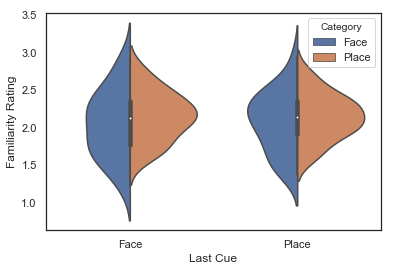

In [71]:
plot = df[df['Trial Type']=='Memory'].groupby(['Subject','Category','Last Cue'], as_index=False).mean()
sb.violinplot(x='Last Cue', y='Familiarity Rating', hue='Category', split=True, data=plot)

In [72]:
for sub in df['Subject'].unique():
    for run in df['Run'].unique():
        
        cat = df[(df['Subject']==sub) & (df['Run']==run)
                & (df['Trial Type']=='Presentation')].iloc[-1]['Cued Category']
        
        
        

# Analyze All Ratings Together

In [73]:
# GROUP DATA BY SUBJECT & ATTN LEVEL
attn_group = df.groupby(['Subject', 'Attention Level'], as_index=False).mean()

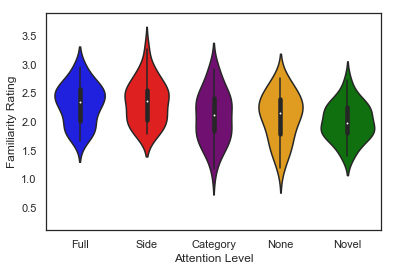

In [74]:
sb.set_style("white")
ax1 = sb.violinplot(x='Attention Level', y='Familiarity Rating', 
                    data=attn_group, order=['Full','Side','Category','None','Novel'], 
                   palette={"Full": "blue", "None": "orange", "Category":"purple","Side":"red","Novel":"green"})
plt.ylim(.1, 3.9)
fig = ax1.get_figure()
fig.savefig("Exp2_Full_Behavioral_Raw_Violin_NoError.pdf")

In [75]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level'], subject='Subject', data=attn_group)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Attention Level,4,116,14.884,7.599156e-10,4.925814e-07,0.339,0.639,False,0.239,0.000011


In [76]:
# def ROC_data(df, novel='matched'):
#     '''
#     input: subject df
#     output: list of three ROC proportion sets (list of dicts): 1) all images, 2) faces, 3) places
#     '''

#     ratings = [4.0, 3.0, 2.0, 1.0]
#     ROC, ROC_f, ROC_h = {},{},{}

#     # for each attention level
#     for attn in ['Novel', 'None', 'Side', 'Full', 'Category']:
#         for idx,roc in enumerate([ROC, ROC_f, ROC_h]):
#             roc[attn] = [0]
#             #roc[attn] = []

#             # for each possible number rating
#             for rate in ratings:
#                 roc[attn].append(ROC_prop_better(df, rate, attn, novel=novel)[idx])

#     return(ROC, ROC_f, ROC_h)


# def ROC_prop_better(df, rate, attn, novel='matched'):
#     '''
#     input: subject df
#            rating - Familiarity score (float between 1.0 and 4.0)
#            attn - at time of encoding (string)

#     output: proportion of images encoded at ATTENTION LEVEL
#             given a score of RATE or higher, sorted by
#             CATEGORY (if category == True)
#     '''

#     # proportions
#     if df.loc[(df['Attention Level'] == attn) 
#                             & (df['Familiarity Rating'] >= rate)].shape[0] >0:
#         combined = float(df.loc[(df['Attention Level'] == attn) 
#                             & (df['Familiarity Rating'] >= rate)].shape[0])/float(df.loc[(df['Attention Level'] == attn) 
#                                                                                     & (df['Familiarity Rating'] > 0)].shape[0])
#     else:
#         combined=np.nan

#     if novel == 'all':
#         # all novel images for desired ratings in both categories
#         denom_f = df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] > 0)].shape[0]
#         denom_p = denom_f

#     else:
#         if novel   == 'matched':
#             f_nov,p_nov = 'Face','Place'
#         elif novel == 'opposite':
#             p_nov,f_nov = 'Place','Face'

#         denom_p = df.loc[(df['Attention Level'] == attn) & (df['Category'] == p_nov) & (df['Familiarity Rating'] > 0)].shape[0]
#         denom_f = (df.loc[(df['Attention Level'] == attn) & (df['Category'] == f_nov) & (df['Familiarity Rating'] > 0)].shape[0])

#     if df.loc[(df['Attention Level'] == attn) & (df['Category'] == 'Face')].shape[0] > 0:
#         face = float(df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] >= rate) & (df['Category'] == 'Face')].shape[0])/denom_f
#     else:
#         face = np.nan

#     if df.loc[(df['Attention Level'] == attn) & (df['Category'] == 'Place')].shape[0] > 0:
#         house = float(df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] >= rate) & (df['Category'] == 'Place')].shape[0])/denom_p
#     else:
#         house = np.nan

#     props = [combined, face, house]
#     return(props)

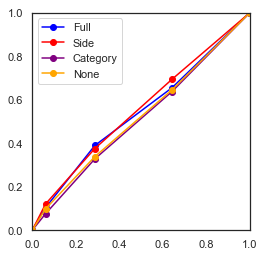

In [91]:
def ROC_plot(ROC_data, save=False, save_path='ROC.pdf'):
    '''
    input: ROC proportions (dictionary)
    output: displays plot of ROC curve
    '''

    fig, ax = plt.subplots()

    for attn,color in zip(['Full', 'Side','Category','None'],['blue','red','purple','orange']):
        ax.plot(ROC_data['Novel'], ROC_data[attn], '-o', label=attn, color=color)

    plt.legend(loc='upper left');
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('exp2_Full_ROC.pdf')
    plt.show()
    
d= ROC_data(df)    

x = ROC_plot(d[1])


# Basic Stats

In [ ]:
# mean
attn_group.groupby(['Attention Level'])['Familiarity Rating'].mean()

In [ ]:
# sd's
attn_group.groupby(['Attention Level'])['Familiarity Rating'].std()

# Category Split Analyses

### Organize Data 

In [30]:
cat_group = df.groupby(['Subject', 'Attention Level','Category'], as_index=False).mean()

# Visualize

### Violin Plot - All Data - Exp 2

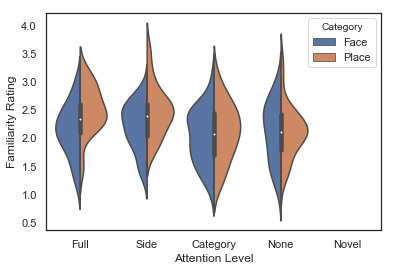

In [31]:
sb.set_style("white")
ax1 = sb.violinplot(x='Attention Level', y='Familiarity Rating', hue='Category', split=True, data=cat_group,
                   order=['Full', 'Side', 'Category', 'None','Novel'])
fig = ax1.get_figure()
fig.savefig("new_14.pdf")

In [32]:
sb.set_style("white")
ax1 = sb.violinplot(x='Attention Level', y='Familiarity Rating', hue='Category', split=True, data=grouped)
fig = ax1.get_figure()
fig.savefig("new_14.pdf")

NameError: name 'grouped' is not defined

In [33]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level','Category'], subject='Subject', data=cat_group)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attention Level,7.657,5,145,1.531,16.744,4.876689e-13,5.873917e-10,0.366,0.717
1,Category,2.065,1,29,2.065,8.022,8.318145e-03,8.318145e-03,0.217,1.000
2,Attention Level * Category,-0.574,5,145,-0.115,6.626,1.385017e-05,6.244286e-04,0.186,0.560


### ROC Curve

In [34]:
# ROC code here
ROC_list = []

for x in df['Subject'].unique():
    dat = pd.DataFrame(ROC_data(df[df['Subject'] == x])[0]).T
    dat['Subject'] = x
    ROC_list.append(dat)
    
ROC_full = pd.concat(ROC_list)
ROC_full['Attention Level'] = ROC_full.index

ZeroDivisionError: float division by zero

In [35]:
ROC_mean  = ROC_full.groupby(['Attention Level']).mean()
ROC_stdev = ROC_full.groupby(['Attention Level']).std()

NameError: name 'ROC_full' is not defined

# ROC, All Images

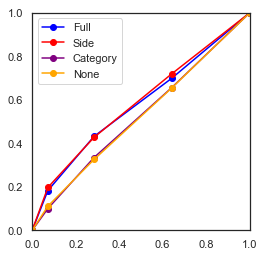

Category AUC: 0.5234456756621736
Full AUC: 0.5783057476938243
None AUC: 0.5218771643871923
Novel AUC: 0.5
Side AUC: 0.5864022453778025


In [22]:
ROC_plot(ROC_mean.T)

for x in ROC_mean.T.columns:
    print( str(x) + ' AUC: ' + str(AUC(ROC_mean.T[0:5]['Novel'], ROC_mean.T[x])) )

# ROC by Category

Face ROC


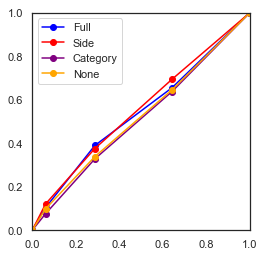

Full Face: 0.5402843601895735
Side Face: 0.5524945106867895
Category Face: 0.5120804142552543
None Face: 0.5212119768277527


Place ROC


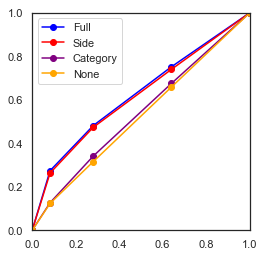

Full Place: 0.6231221502279818
Side Place: 0.6151049232273297
Category Place: 0.5357429607466265
None Place: 0.5221939552528105




In [23]:
face_ROC, place_ROC = 0,0

for x,y,z in zip([face_ROC, place_ROC],[1,2],['Face','Place']):
    ROC_dat = ROC_data(df, novel='matched')[y]
    print(z+' ROC')
    ROC_plot(ROC_dat)
    
    for cat in ['Full','Side','Category','None']:
        print(cat+' '+z+': '+str(AUC(ROC_dat['Novel'], ROC_dat[cat])))
    print()
    print()

# Analyze

### Repeated Measure ANOVA - all data - exp 2

In [27]:
# grouped['FR'] = grouped['Familiarity Rating']
# grouped['AL'] = grouped['Attention Level'   ]
pingouin.rm_anova(dv='Familiarity Rating', 
                  within=['Attention Level'], subject='Subject', data=attn_group)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Attention Level,4,116,14.884,7.599156e-10,4.925814e-07,0.339,0.639,False,0.239,0.000011


### t-tests, all images

In [28]:
grouped_again = df.groupby(['Subject', 'Attention Level'], as_index=False).mean()

pair = combinations(df[df['Trial Type']=='Memory']['Attention Level'].unique(),2) 
   
for i in list(pair): 
   
    p = scipy.stats.ttest_rel(grouped_again[grouped_again['Attention Level']==i[0]]['Familiarity Rating'], 
                          grouped_again[grouped_again['Attention Level']==i[1]]['Familiarity Rating'])
    
    #if p[1] <.05:
    print(i)
    print('p = ' + str(p))
    print(' ')

('Side', 'None')
p = Ttest_relResult(statistic=3.5711400958656068, pvalue=0.0012637760904546636)
 
('Side', 'Novel')
p = Ttest_relResult(statistic=6.85034017352441, pvalue=1.5929721367210212e-07)
 
('Side', 'Category')
p = Ttest_relResult(statistic=3.6289571057251857, pvalue=0.0010842944298000898)
 
('Side', 'Full')
p = Ttest_relResult(statistic=0.528852486664906, pvalue=0.6009325209397118)
 
('None', 'Novel')
p = Ttest_relResult(statistic=2.072998747883646, pvalue=0.04716298337627885)
 
('None', 'Category')
p = Ttest_relResult(statistic=0.013365259637578316, pvalue=0.9894279086029338)
 
('None', 'Full')
p = Ttest_relResult(statistic=-3.2020627908980073, pvalue=0.0033010006525049096)
 
('Novel', 'Category')
p = Ttest_relResult(statistic=-1.9557281622268194, pvalue=0.060192697179814646)
 
('Novel', 'Full')
p = Ttest_relResult(statistic=-7.456805540460729, pvalue=3.226314509067884e-08)
 
('Category', 'Full')
p = Ttest_relResult(statistic=-3.9642811951115493, pvalue=0.0004407743264506259)

### t-test, faces vs. places

In [29]:
grouped_again = df.groupby(['Subject', 'Attention Level','Category'], as_index=False).mean()

#pair = combinations(df[df['Trial Type']=='Memory']['Attention Level'].unique(),2) 
pair = [('Full','Full'),('Category','Category'),('Novel','Novel'),('None','None'),('Side','Side')] 
    
for i in list(pair): 
   
    p = scipy.stats.ttest_rel(grouped_again[(grouped_again['Attention Level']==i[0])
                                            & (grouped_again['Category']=='Face')
                                           ]['Familiarity Rating'], 
                          grouped_again[(grouped_again['Attention Level']==i[1])
                                       & (grouped_again['Category']=='Place')]['Familiarity Rating'])
    
    #if p[1] <.05:
    print(i)
    print('p = ' + str(p))
    print(' ')

('Full', 'Full')
p = Ttest_relResult(statistic=-3.6122493003149714, pvalue=0.001133445225594122)
 
('Category', 'Category')
p = Ttest_relResult(statistic=-1.155408443631455, pvalue=0.25735447783263704)
 
('Novel', 'Novel')
p = Ttest_relResult(statistic=-0.22531689595427445, pvalue=0.8233130378066164)
 
('None', 'None')
p = Ttest_relResult(statistic=-0.10094876623166685, pvalue=0.9202858431433315)
 
('Side', 'Side')
p = Ttest_relResult(statistic=-3.8921790503277474, pvalue=0.0005357182292581743)
 


In [ ]:
for i in list(pair): 
   
    p = scipy.stats.ttest_rel(grouped_again[(grouped_again['Attention Level']=='Full')
                                            & (grouped_again['Category']=='Place')
                                           ]['Familiarity Rating'], 
                          grouped_again[(grouped_again['Attention Level']=='Side')
                                       & (grouped_again['Category']=='Place')]['Familiarity Rating'])
    print(p)

# GRAVEYARD

# +++++++ OTHER ++++++++

### ROC Plots

TypeError: tuple indices must be integers or slices, not str

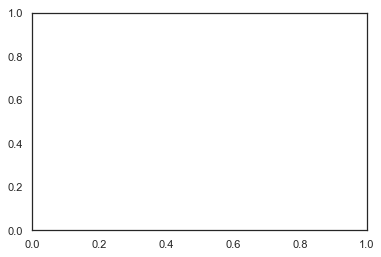

In [37]:
ROC_plot(ROC_data(df=grouped, novel='matched'))

In [20]:
ROC_plot(ROC_data(df, novel='matched')[1])

NameError: name 'ROC_plot' is not defined

In [28]:
# FACE AUC's
AUC(ROC_data(df, novel='matched')[1]['Full'])

TypeError: AUC() missing 1 required positional argument: 'y_vals'

In [ ]:
# Place AUC's

In [34]:
AUC(ROC_data(df, novel='matched')[2]['Full'],ROC_data(df, novel='matched')[2]['Full'])

ZeroDivisionError: float division by zero

In [35]:
ROC_plot(ROC_data(df, novel='matched')[2])

ZeroDivisionError: float division by zero

In [36]:
ROC_plot(ROC_data(df, novel='matched')[1])

ZeroDivisionError: float division by zero

In [37]:
for x in df['Subject'].unique():
    dat = ROC_data(df=df[df['Subject']==x], novel='matched')
    print('subject '+str(x))
    ROC_plot(dat[0])
    ROC_plot(dat[1])
    ROC_plot(dat[2])

ZeroDivisionError: float division by zero

In [38]:
def ROC_prop(df, rate, attn, novel='matched'):
    '''
    input: subject df
           rating - Familiarity score (float between 1.0 and 4.0)
           attn - at time of encoding (string)

    output: proportion of images encoded at ATTENTION LEVEL
            given a score of RATE or higher, sorted by
            CATEGORY (if category == True)
    '''

    # proportions
    combined = float(df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] >= rate)].shape[0])/float(df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] > 0)].shape[0])

    if novel == 'all':
        # all novel images for desired ratings in both categories
        denom_f = df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] > 0)].shape[0]
        denom_p = denom_f

    else:
        if novel   == 'matched':
            f_nov,p_nov = 'Face','Place'
        elif novel == 'opposite':
            p_nov,f_nov = 'Place','Face'

        denom_p = df.loc[(df['Attention Level'] == attn) & (df['Category'] == p_nov) & (df['Familiarity Rating'] > 0)].shape[0]
        denom_f = (df.loc[(df['Attention Level'] == attn) & (df['Category'] == f_nov) & (df['Familiarity Rating'] > 0)].shape[0])

    if df.loc[(df['Attention Level'] == attn) & (df['Category'] == 'Face')].shape[0] > 0:
        face = float(df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] >= rate) & (df['Category'] == 'Face')].shape[0])/denom_f
    else:
        face = np.nan

    if df.loc[(df['Attention Level'] == attn) & (df['Category'] == 'Place')].shape[0] > 0:
        house = float(df.loc[(df['Attention Level'] == attn) & (df['Familiarity Rating'] >= rate) & (df['Category'] == 'Place')].shape[0])/denom_p
    else:
        house = np.nan

    props = [combined, face, house]
    return(props)



def ROC_data(df, novel='matched'):
    '''
    input: subject df
    output: list of three ROC proportion sets (list of dicts): 1) all images, 2) faces, 3) places
    '''

    ratings = [4.0, 3.0, 2.0, 1.0]
    ROC, ROC_f, ROC_h = {},{},{}

    # for each attention level
    for attn in ['Novel', 'None', 'Side', 'Full', 'Category']:
        for idx,roc in enumerate([ROC, ROC_f, ROC_h]):
            roc[attn] = [0]

            # for each possible number rating
            for rate in ratings:
                roc[attn].append(ROC_prop(df, rate, attn, novel=novel)[idx])

    return(ROC, ROC_f, ROC_h)



def ROC_plot(ROC_data):
    '''
    input: ROC proportions (dictionary)
    output: displays plot of ROC curve
    '''

    fig, ax = plt.subplots()

    for attn in ['Category', 'Full', 'None', 'Side']:
        ax.plot(ROC_data['Novel'], ROC_data[attn], '-o', label=attn)

    plt.legend(loc='upper left');
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot([0,1], [0, 1], color='black', marker='o', linestyle='dashed', linewidth=1, markersize=1)
    plt.show()



def ROC_df(df):

    '''
    input:  full df
    output: list of subject df's with run-wise ROC data
    '''

    subject_list = []

    for sub in df['Subject'].unique():
        subject=[]

        for run in df['Run'].unique():
            subject.append(ROC_data(df[(df['Run']==run) & (df['Subject']==sub)]))
        subject_list.append(subject)

    return(subject_list)


In [23]:
len(df['Memory Image'].unique())

321